In [150]:
# Import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [83]:
# Get data
data = pd.read_csv('world-happiness-report-2021.csv') 

In [84]:
# Overview of data
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


## Prepare data

* Choose columns which are usefull and accurate for explotary data analysis: find out what makes a country happy or unhappy.

In [10]:
data_columns = ['Country name', 'Regional indicator', 'Ladder score', 'Logged GDP per capita', 
                'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 
                'Generosity', 'Perceptions of corruption']

### In this EDA, areas of interest will be: 
* Country name
* Ladder score
* Logged GDP per capita
* Social support
* Healthy life expectancy
* Freedom to make life choices
* Generosity
* Perceptions of corruption

In [11]:
data = data[data_columns].copy()

* Rename columns in lower case and shorter form so that we can avoid error and data become easier to use.

In [129]:
happy_df = data.rename({'Country name':'country', 'Regional indicator':'region', 
                        'Ladder score':'happiness_score', 'Logged GDP per capita':'GDP_per_cap', 
                        'Social support':'social_support', 'Healthy life expectancy':'healthy_life_expect', 
                        'Freedom to make life choices':'freedom_life_choices', 'Generosity':'generosity', 
                        'Perceptions of corruption':'perceptions_corruption'}, axis =1)

* Let's look for general information about data and see whether any missing values we have to deal with.

In [58]:
happy_df.head()

,country,region,happiness_score,GDP_per_cap,social_support,healthy_life_expect,freedom_life_choices,generosity,perceptions_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [79]:
# Information about the number of rows and columns
happy_df.shape

(149, 9)

In [80]:
happy_df.describe()

,happiness_score,GDP_per_cap,social_support,healthy_life_expect,freedom_life_choices,generosity,perceptions_corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


In [59]:
# Count null values in data
happy_df.isnull().sum()

country                   0
region                    0
happiness_score           0
GDP_per_cap               0
social_support            0
healthy_life_expect       0
freedom_life_choices      0
generosity                0
perceptions_corruption    0
dtype: int64

In [81]:
print('Number of unique values in Country:', len(happy_df['country'].unique()))

Number of unique values in Country: 149


In [82]:
print('Unique values in Region:', happy_df['region'].unique())
print('Number of unique values in Region:', len(happy_df['region'].unique()))

Unique values in Region: ['Western Europe' 'North America and ANZ' 'Middle East and North Africa'
 'Latin America and Caribbean' 'Central and Eastern Europe' 'East Asia'
 'Southeast Asia' 'Commonwealth of Independent States'
 'Sub-Saharan Africa' 'South Asia']
Number of unique values in Region: 10


### Elements results

* There are 149 unique countries
* We also have 10 regional indicators.
* 0 duplicate rows is found.
* No null values is found.

### Happiness Score at Regional Level

Before going into the detail (each country) of the dataset, we will look over the informantion of all region.

In [131]:
happy_df.groupby('region')['happiness_score'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Central and Eastern Europe,17.0,5.984765,0.493325,5.101,5.81300,6.0780,6.25500,6.965
Commonwealth of Independent States,12.0,5.467000,0.438116,4.875,5.14475,5.4715,5.74950,6.179
East Asia,6.0,5.810333,0.439913,5.339,5.52700,5.7610,5.91625,6.584
Latin America and Caribbean,20.0,5.908050,0.693467,3.615,5.75200,5.9920,6.31100,7.069
Middle East and North Africa,17.0,5.219765,0.999259,3.658,4.58400,4.8870,6.10600,7.157
North America and ANZ,4.0,7.128500,0.138057,6.951,7.06500,7.1430,7.20650,7.277
South Asia,7.0,4.441857,0.993462,2.523,4.07200,4.9340,5.11150,5.269
Southeast Asia,9.0,5.407556,0.606271,4.426,5.03000,5.3840,5.88000,6.377
Sub-Saharan Africa,36.0,4.494472,0.654892,3.145,4.09850,4.6160,4.99925,6.049


Based on the table above, there are some comments on it:
* Western Europe has the highest happiness score.
* South Asia has the lowest happiness score.
* North America and ANZ; Western Europe are top 2 of highest average happiness score. 

<AxesSubplot:xlabel='happiness_score', ylabel='region'>

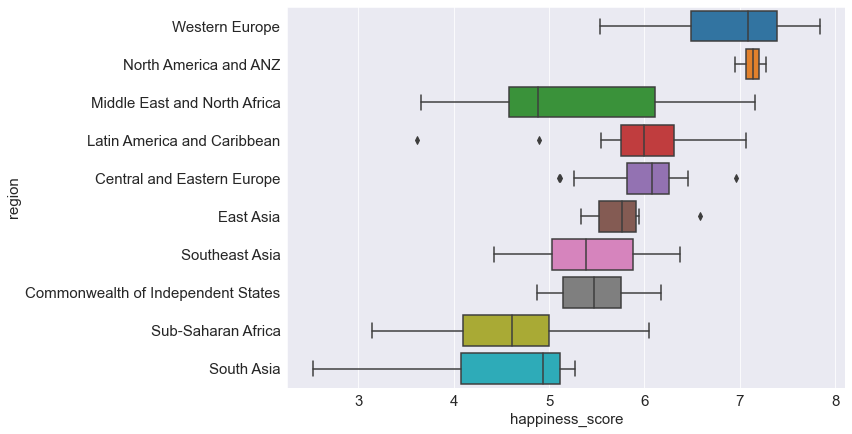

In [172]:
sns.boxplot(x = happy_df['happiness_score'], y = happy_df['region'], data = happy_df)

* North America and ANZ the box plot is very diffirent. One reason could be there are lesser number of countries in this region.
* There are outliers in 3 regions: Latin America and Caribbean; Central and Eastern Europe; East Asia.
* Southeast Asia; Middle East and North Africa have long tale in both sides. It means that these 2 regions have more spread scores than others.

### The correlation among the numerical variables in the dataset.

In [126]:
cor = happy_df.corr()
cor

,happiness_score,GDP_per_cap,social_support,healthy_life_expect,freedom_life_choices,generosity,perceptions_corruption
happiness_score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
GDP_per_cap,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
social_support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
healthy_life_expect,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
freedom_life_choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
perceptions_corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


<AxesSubplot:>

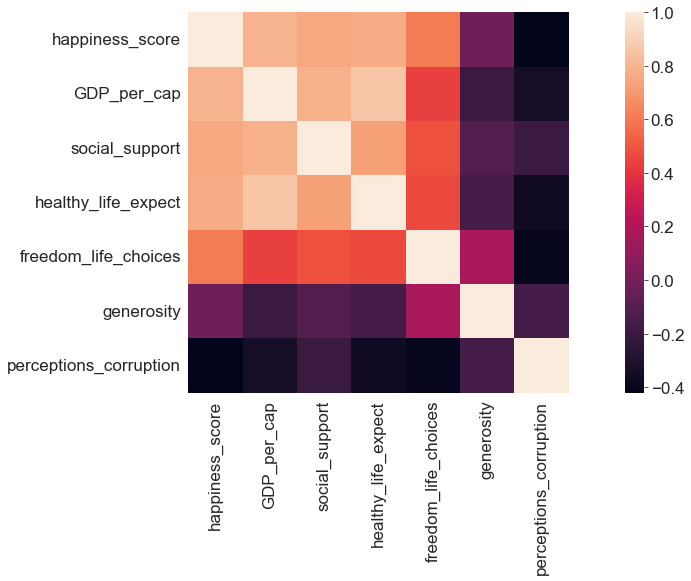

In [237]:
# Create Correlation Map for all elements

f, ax = plt.subplots(figsize = (20, 7))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype = bool), square = True, ax=ax)

* Happiness Score has strong level correlation with GDP, Social Support and Healthy Life Expectancy.
* Freedom to Make Life Choices and Happiness Score have mid level correlation between them.
* Generosity have weak level correlation with Happiness Score.
* Perceptions of Corruption and Happiness Score have negative level correlation between them.

### Observation about GDP, Healthy Life Expectancy and Happiness Score - strong level correlation:

In [220]:
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)

Text(0, 0.5, 'Happiness Score')

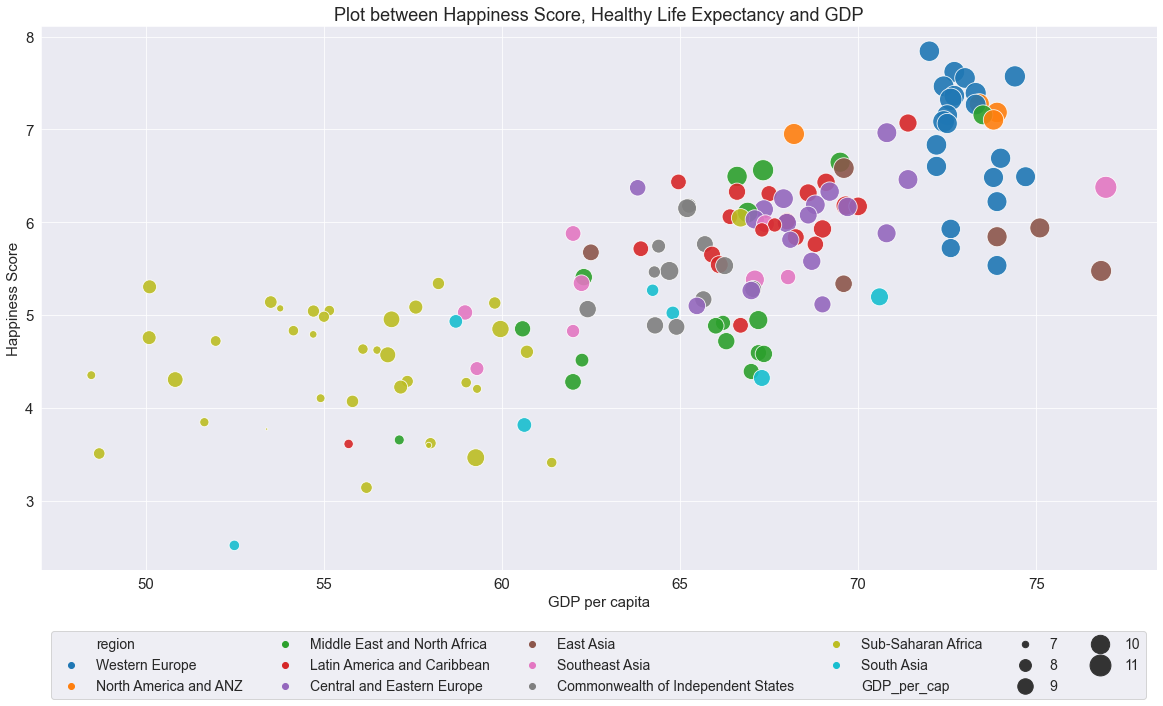

In [169]:
# Plot between happiness and GDP

sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Plot between Happiness Score, Healthy Life Expectancy and GDP')
sns.scatterplot(x = happy_df.healthy_life_expect, y = happy_df.happiness_score, 
                hue = happy_df.region, alpha = 0.9, 
                size = happy_df['GDP_per_cap'], sizes = (5, 500))

plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.1), fontsize = '14', ncol = 6)
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')

* Countries have higher Logged GDP per capita and higher Life Expectancy will almost have higher Happiness Score.
* By and large, African countries  have lower Life Expectancy, a lower GDP and ultimately lower Happiness Scores Index.
* Some countries in Southeast Asia and East Asia have the highest index in GDP and Life Expectancy but do not have high Happiness Score.

In [122]:
top_10 = happy_df.sort_values(by = 'happiness_score', ascending = False).head(10)
bottom_10 = happy_df.sort_values(by = 'happiness_score').head(10)

In [204]:
top_10.head(3)

,country,region,happiness_score,GDP_per_cap,social_support,healthy_life_expect,freedom_life_choices,generosity,perceptions_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292


In [190]:
bottom_10.head(3)

,country,region,happiness_score,GDP_per_cap,social_support,healthy_life_expect,freedom_life_choices,generosity,perceptions_corruption
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167


In [226]:
top_bottom = top_10.append(bottom_10)
top_bottom

,country,region,happiness_score,GDP_per_cap,social_support,healthy_life_expect,freedom_life_choices,generosity,perceptions_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.400,0.913,0.175,0.338
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270
6,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.600,0.907,-0.034,0.386
8,New Zealand,North America and ANZ,7.277,10.643,0.948,73.400,0.929,0.134,0.242
9,Austria,Western Europe,7.268,10.906,0.934,73.300,0.908,0.042,0.481


In [218]:
# Average values in each region
continent_score = happy_df.groupby('region')['happiness_score', 
                                             'GDP_per_cap', 
                                             'healthy_life_expect',
                                             'social_support',
                                            'freedom_life_choices', 
                                             'perceptions_corruption'].mean().reset_index()

Text(0, 0.5, 'Happiness Score')

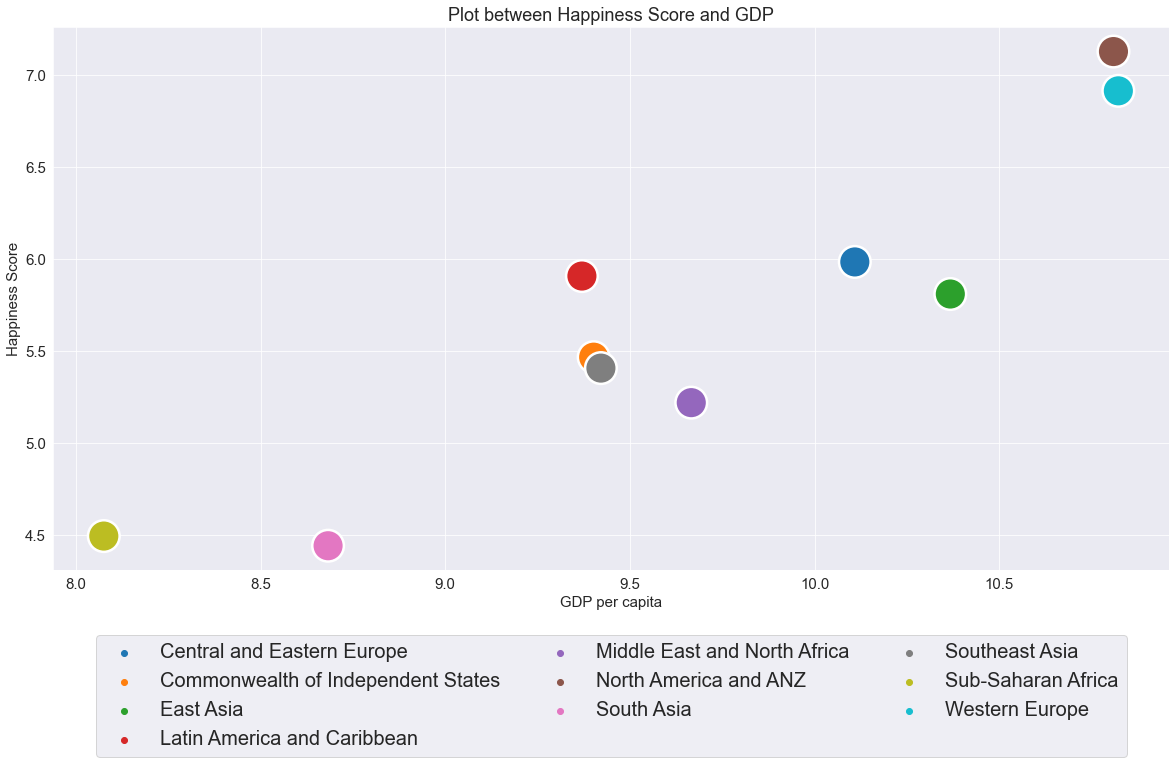

In [187]:
# Plot between happiness and GDP in each region
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)

sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Plot between Happiness Score and GDP')
sns.scatterplot(x = continent_score.GDP_per_cap, y = continent_score.happiness_score, 
                hue = continent_score.region,
                s = 1000)

plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.1), fontsize = '20', ncol = 3)
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')

* Sub-Saharan Africa and South Asia have the lowest scores. 
* Western Europe and North America & ANZ are at the top.

### Healthy Life Expectancy

Text(599.1068181818181, 0.5, 'Life Expectancy')

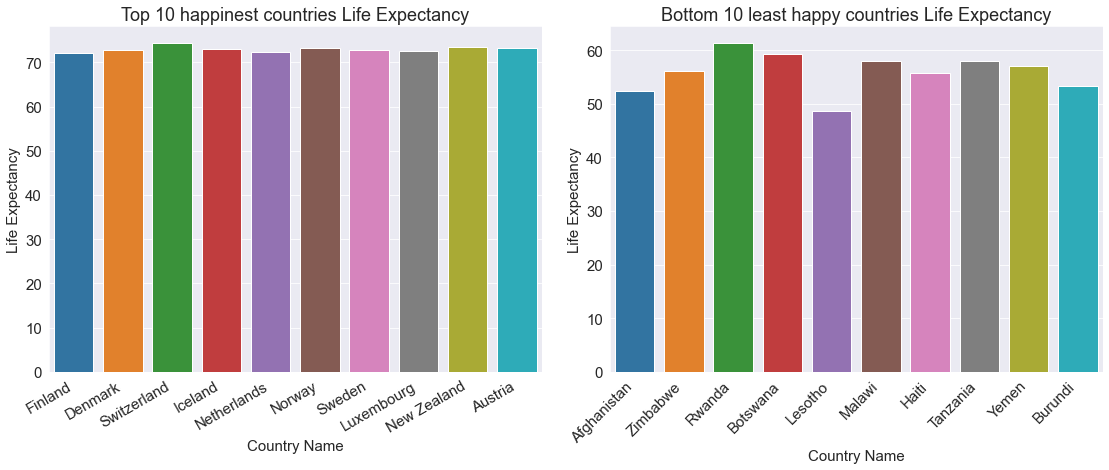

In [173]:
fig, axes = plt.subplots(1, 2, figsize = (16, 6))
plt.tight_layout(pad = 2)
xlabels = top_10.country
axes[0].set_title('Top 10 happinest countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation = 30, ha = 'right')
sns.barplot(x = top_10.country, y = top_10.healthy_life_expect, ax = axes[0])
axes[0].set_xlabel('Country Name')
axes[0].set_ylabel('Life Expectancy')

xlabels = bottom_10.country
axes[1].set_title('Bottom 10 least happy countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation = 45, ha = 'right')
sns.barplot(x = bottom_10.country, y = bottom_10.healthy_life_expect, ax = axes[1])
axes[1].set_xlabel('Country Name')
axes[1].set_ylabel('Life Expectancy')

### Social Support

Text(0, 0.5, 'Social Support')

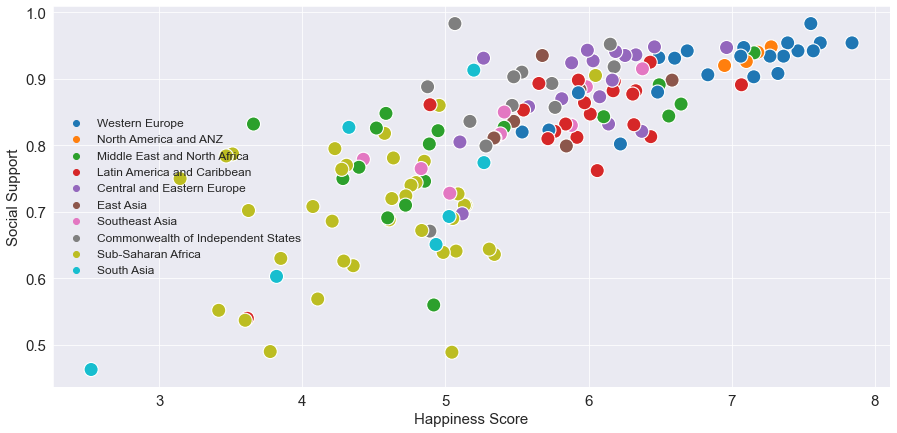

In [215]:
# Relationship between social support and happiness score
# Plot 2 variables in all countries

plt.rcParams['figure.figsize'] = (15, 7)
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.social_support, 
                hue = happy_df.region, s = 200)
plt.legend(frameon = False, loc = 'center left', fontsize = '12')
plt.xlabel('Happiness Score')
plt.ylabel('Social Support')

Text(0, 0.5, 'Happiness Score')

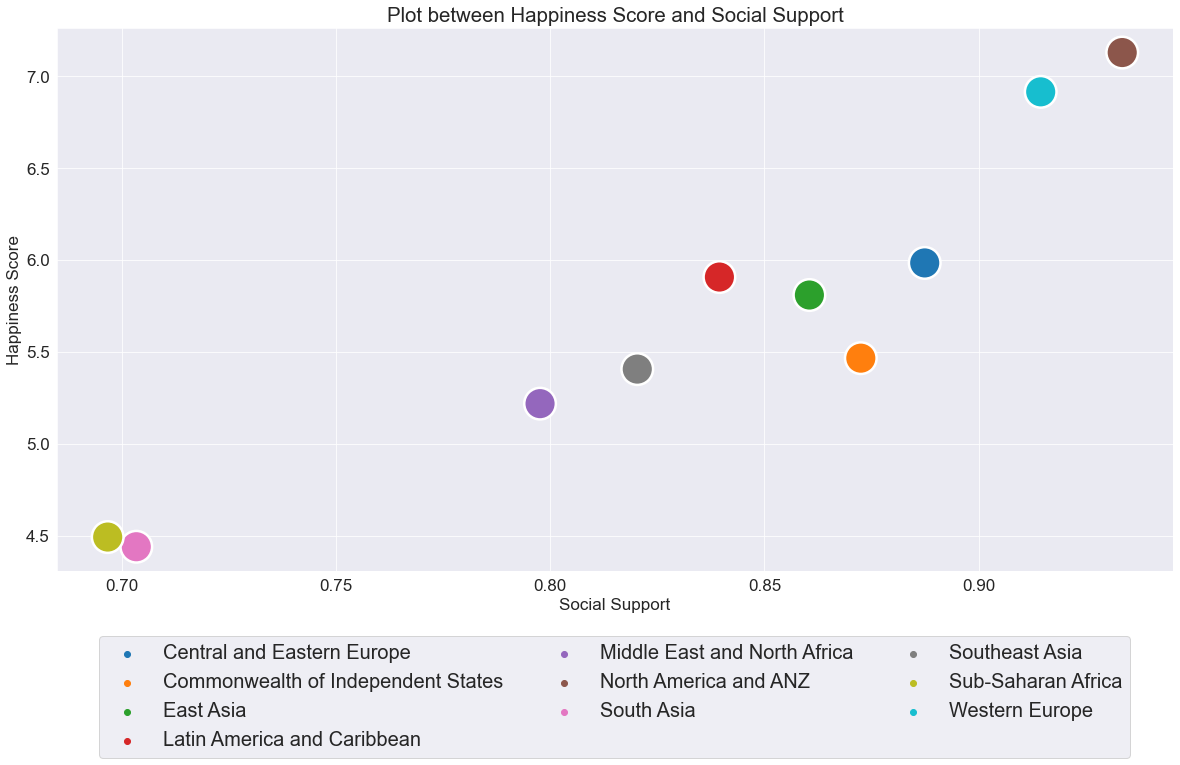

In [234]:
# Plot between happiness and social support in each region
plt.rcParams['font.size'] = 17
plt.rcParams['figure.figsize'] = (10,7)

sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = (20, 10)
plt.title('Plot between Happiness Score and Social Support')
sns.scatterplot(x = continent_score.social_support, y = continent_score.happiness_score, 
                hue = continent_score.region,
                s = 1000)

plt.legend(loc = 'upper center', bbox_to_anchor=(0.5, -0.1), fontsize = '20', ncol = 3)
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')

### Freedom to make life choices: mid level correlation with Happiness Score

Text(0, 0.5, 'Happiness Score')

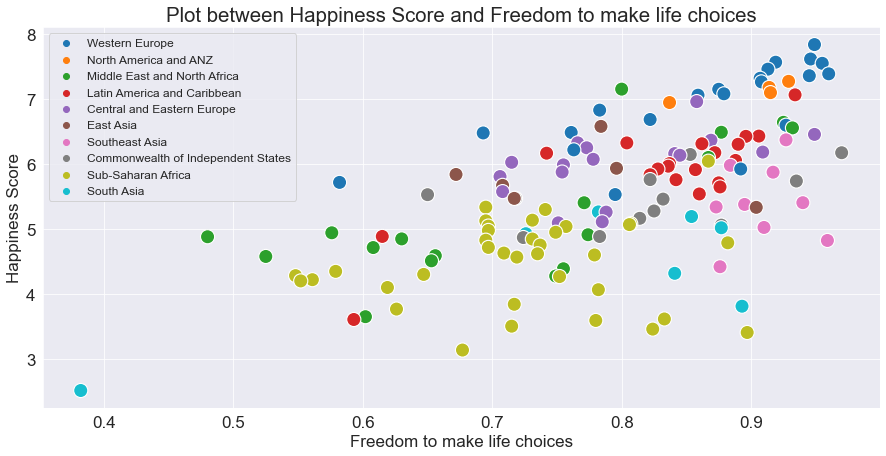

In [235]:
plt.rcParams['figure.figsize'] = (15, 7)

plt.title('Plot between Happiness Score and Freedom to make life choices')
sns.scatterplot(x = happy_df.freedom_life_choices, y = happy_df.happiness_score, hue = happy_df.region, s = 200)

plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')

### Generosity and Happiness Score

In [227]:
top_bottom.sort_values(by = 'generosity')

,country,region,happiness_score,GDP_per_cap,social_support,healthy_life_expect,freedom_life_choices,generosity,perceptions_corruption
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
140,Yemen,Middle East and North Africa,3.658,7.578,0.832,57.122,0.602,-0.147,0.800
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.600,0.907,-0.034,0.386
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179


* Easily to see that there is a weak level correlation between generosity and happiness scores.

<AxesSubplot:xlabel='generosity', ylabel='happiness_score'>

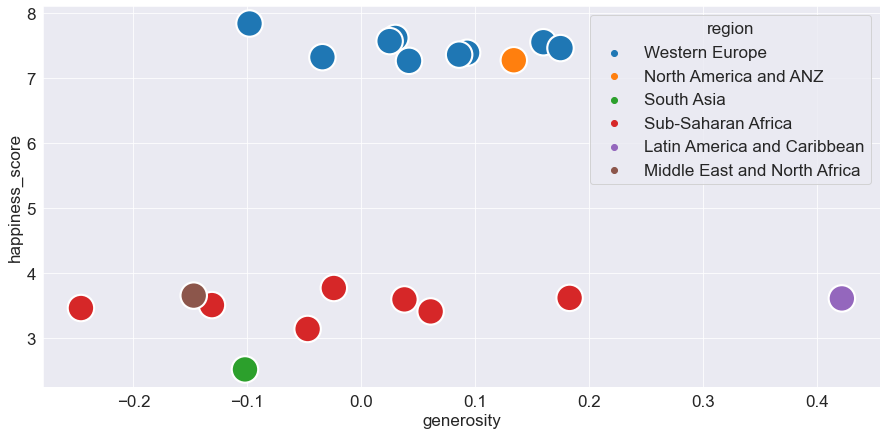

In [238]:
sns.scatterplot(x = top_bottom.generosity, y = top_bottom.happiness_score,
                hue = top_bottom.region, s = 700)

## How is Corruption related to Happiness?

In [108]:
# Calculate average perceptions of corruption in each regional indicator

corruption = happy_df.groupby('region')['perceptions_corruption'].mean().sort_values()
corruption

region
North America and ANZ                 0.449250
Western Europe                        0.523095
East Asia                             0.683333
Southeast Asia                        0.709111
Commonwealth of Independent States    0.725083
Middle East and North Africa          0.762235
Sub-Saharan Africa                    0.765944
Latin America and Caribbean           0.792600
South Asia                            0.797429
Central and Eastern Europe            0.850529
Name: perceptions_corruption, dtype: float64

<BarContainer object of 10 artists>

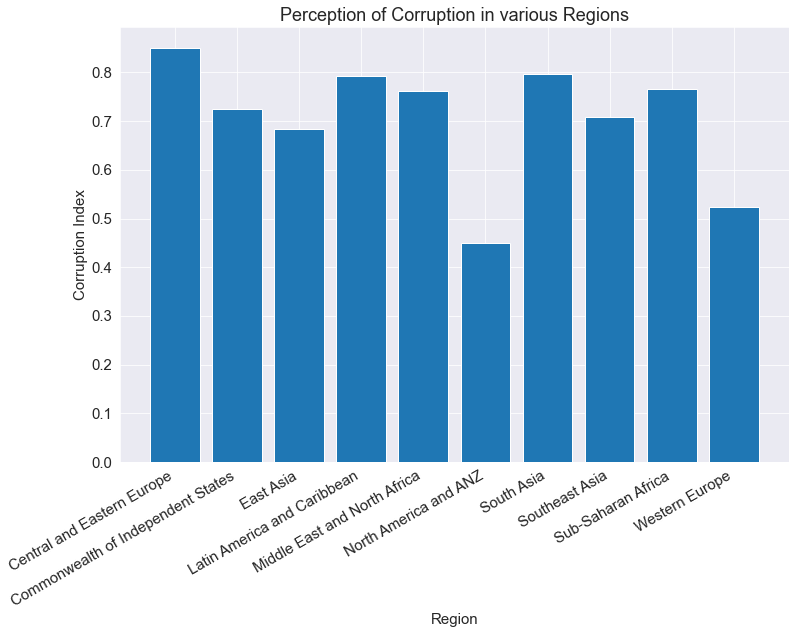

In [51]:
# Create a bar char for average corruption index in 10 regions

plt.rcParams['figure.figsize'] = (12,8)
plt.title('Perception of Corruption in various Regions')
plt.xlabel('Region')
plt.ylabel('Corruption Index')
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corruption.index, corruption.perceptions_corruption)

<BarContainer object of 10 artists>

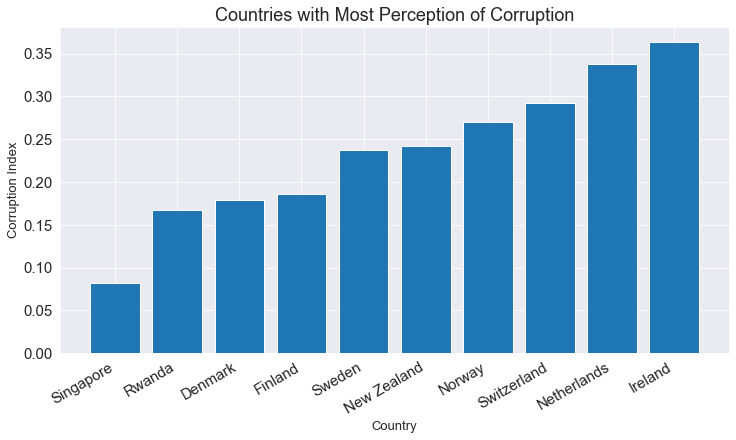

In [71]:
# Plot a bar char for top 10 happiest countries

country = happy_df.sort_values(by = 'perceptions_corruption').head(10)

plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Countries with Most Perception of Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country, country.perceptions_corruption)

<BarContainer object of 10 artists>

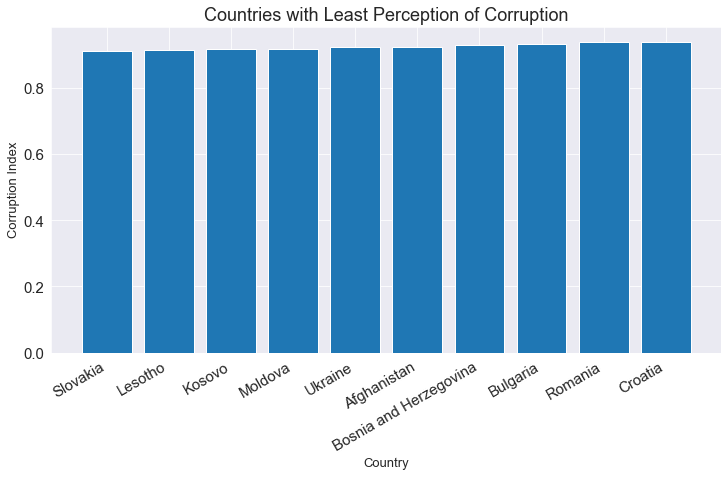

In [72]:
# Creat a bar char for 10 countries have least happiness score

country = happy_df.sort_values(by = 'perceptions_corruption').tail(10)

plt.rcParams['figure.figsize'] = (12, 6)
plt.title('Countries with Least Perception of Corruption')
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country, country.perceptions_corruption)